# 零基础实战机器学习

## 第18讲 增长模型裂变实战

作者 黄佳

极客时间专栏链接：https://time.geekbang.org/column/intro/438


问题：判断哪种裂变带来更大的增长幅度

营销团队为易速鲜花的用户设计了两种裂变方案——“情侣花享”和“拼团盛放”，一个是类似于买一送一的促销，让用户把促销分享给自己的另一半。另一个裂变方案是用过生成专属海报进行拼团购买，团越大促销折扣越大。

那么，如何让机器自动的识别出，某一种裂变（或者说其它促销方案）所最易感的人群，然后把该裂变发给他或她呢？


## 数据导入

In [1]:
import pandas as pd #导入Pandas
import numpy as np #导入NumPy
df_fission = pd.read_csv('易速鲜花增长模型.csv') #载入数据
print('用户数:', df_fission.count()['用户码']) #查看数据条目数
df_fission.head() #显示头几行数据

用户数: 64000


,用户码,曾助力,曾拼团,曾推荐,设备,城市类型,R值,M值,裂变类型,是否转化
0,1,0,1,0,电脑,中小,10,138.00,情侣花享,0
1,2,0,1,0,电脑,一线,4,105.59,拼团盛放,0
2,3,0,1,0,电脑,一线,1,494.13,拼团盛放,1
3,4,0,1,1,手机,二线,10,148.45,没有促销,0
4,5,1,0,0,手机,二线,2,337.18,拼团盛放,0


## 可视化

C:\Users\jacky.huang\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


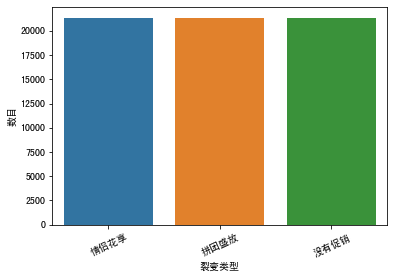

In [2]:
import matplotlib.pyplot as plt #导入pyplot模块
import seaborn as sns #导入Seaborn
fig = sns.countplot('裂变类型', data=df_fission) #创建柱状计数图
fig.set_xticklabels(fig.get_xticklabels(),rotation=25) #X轴标签倾斜
fig.set_ylabel("数目") #Y轴标题
plt.show() #显示图像

<BarContainer object of 3 artists>

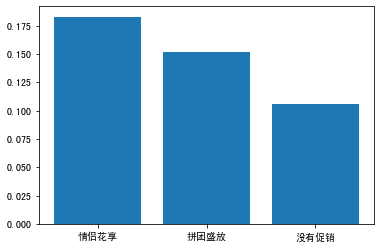

In [3]:
df_plot = df_fission.groupby('裂变类型').是否转化.mean().reset_index() #促销分组的转化率均值
plt.bar(df_plot['裂变类型'],df_plot['是否转化']) #不同促销转化均值柱状图

## 创建哑变量

In [4]:
df_dummies = df_fission.drop(['裂变类型'],axis=1) #在拆分哑变量前，先拿掉裂变类型
df_dummies = pd.get_dummies(df_dummies, drop_first = True) #为分类变量拆分哑变量
df_dummies['裂变类型'] = df_fission['裂变类型'] #把裂变类型放回去
df_fission = df_dummies.copy() #把哑变量数据集复制给元数据集
df_fission.head() #显示数据

,用户码,曾助力,曾拼团,曾推荐,R值,M值,是否转化,设备_手机,设备_电脑,城市类型_中小,城市类型_二线,裂变类型
0,1,0,1,0,10,138.00,0,0,1,1,0,情侣花享
1,2,0,1,0,4,105.59,0,0,1,0,0,拼团盛放
2,3,0,1,0,1,494.13,1,0,1,0,0,拼团盛放
3,4,0,1,1,10,148.45,0,1,0,0,1,没有促销
4,5,1,0,0,2,337.18,0,1,0,0,1,拼团盛放


### 构建特征和标签数据集

In [5]:
df_discount = df_fission.query("裂变类型 == '情侣花享' | 裂变类型 == '没有促销'")

In [6]:
df_discount.loc[(df_discount.裂变类型 == '情侣花享') & (df_discount.是否转化 == 1), '标签'] = 0 #有应答裂变组,裂变购买者
df_discount.loc[(df_discount.裂变类型 == '情侣花享') & (df_discount.是否转化 == 0), '标签'] = 1 #无应答裂变组,裂变未购买者
df_discount.loc[(df_discount.裂变类型 == '没有促销') &  (df_discount.是否转化 == 1), '标签'] = 2 #有应答控制组,无裂变购买者
df_discount.loc[(df_discount.裂变类型 == '没有促销') &  (df_discount.是否转化 == 0), '标签'] = 3 #无应答控制组,无裂变未购买者
df_discount.head()

C:\Users\jacky.huang\Anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\jacky.huang\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\jacky.huang\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

,用户码,曾助力,曾拼团,曾推荐,R值,M值,是否转化,设备_手机,设备_电脑,城市类型_中小,城市类型_二线,裂变类型,标签
0,1,0,1,0,10,138.00,0,0,1,1,0,情侣花享,1.0
3,4,0,1,1,10,148.45,0,1,0,0,1,没有促销,3.0
5,6,0,1,1,10,56.48,0,0,1,0,1,情侣花享,1.0
6,7,1,1,1,2,551.98,0,0,0,0,0,情侣花享,1.0
8,9,1,0,1,7,29.99,1,0,1,0,1,情侣花享,0.0


In [7]:
X = df_discount.drop(['标签','是否转化'],axis=1) #特征集，Drop掉便签相关字段
y = df_discount.标签 #标签集

### 拆分数据集

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

In [9]:
X

,用户码,曾助力,曾拼团,曾推荐,R值,M值,设备_手机,设备_电脑,城市类型_中小,城市类型_二线,裂变类型
0,1,0,1,0,10,138.00,0,1,1,0,情侣花享
3,4,0,1,1,10,148.45,1,0,0,1,没有促销
5,6,0,1,1,10,56.48,0,1,0,1,情侣花享
6,7,1,1,1,2,551.98,0,0,0,0,情侣花享
8,9,1,0,1,7,29.99,0,1,0,1,情侣花享
...,...,...,...,...,...,...,...,...,...,...,...
63991,63992,1,0,1,2,509.72,1,0,0,1,情侣花享
63992,63993,1,0,0,1,29.99,1,0,1,0,情侣花享
63993,63994,0,1,1,2,499.62,1,0,1,0,情侣花享
63996,63997,0,1,1,3,158.03,1,0,0,1,情侣花享


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [11]:
import xgboost as xgb #导入xgboost模型
xgb_model = xgb.XGBClassifier() #创建xgboost模型
xgb_model.fit(X_train.drop(['用户码','裂变类型'], axis=1), y_train) #拟合xgboost模型

C:\Users\jacky.huang\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:01:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [12]:
uplift_probs = xgb_model.predict_proba(X_test.drop(['用户码','裂变类型'], axis=1)) #预测测试集用户的分类概率
uplift_probs #显示4种概率

array([[0.10408288, 0.42887658, 0.02090275, 0.44613782],
       [0.13568689, 0.47382146, 0.0910695 , 0.29942212],
       [0.08241459, 0.39959702, 0.10955084, 0.40843758],
       ...,
       [0.24106652, 0.37841547, 0.18507037, 0.19544768],
       [0.04672149, 0.46512628, 0.02754113, 0.46061108],
       [0.02860421, 0.450275  , 0.00923175, 0.51188904]], dtype=float32)

## 求出增量分数

In [14]:
discount_uplift = X_test.copy() #构建增量分数数据集   
discount_uplift['P_TR'] = uplift_probs[:,0] #添加有应答裂变概率
discount_uplift['P_TN'] = uplift_probs[:,1] #添加无应答裂变概率
discount_uplift['P_CR'] = uplift_probs[:,2] #添加有应答控制概率
discount_uplift['P_CN'] = uplift_probs[:,3] #添加无应答控制概率
#计算增量分数
discount_uplift['增量分数'] = discount_uplift.eval('P_TR + P_CN - (P_TN + P_CR)') 
# discount_uplift['增量分数'] = discount_uplift.eval('P_CN/(P_CN+P_CR) + P_TR/(P_TN+P_TR) - (P_TN/(P_TN+P_TR) - P_CR/(P_CN+P_CR))') 
discount_uplift

,用户码,曾助力,曾拼团,曾推荐,R值,M值,设备_手机,设备_电脑,城市类型_中小,城市类型_二线,裂变类型,P_TR,P_TN,P_CR,P_CN,增量分数
50706,50707,0,1,0,10,271.77,1,0,0,0,没有促销,0.104083,0.428877,0.020903,0.446138,0.100441
37013,37014,0,1,0,3,250.76,0,1,0,0,没有促销,0.135687,0.473821,0.091070,0.299422,-0.129782
14685,14686,0,1,0,2,341.75,1,0,0,1,没有促销,0.082415,0.399597,0.109551,0.408438,-0.018296
19737,19738,0,1,1,10,29.99,0,1,0,1,没有促销,0.062630,0.467461,0.026409,0.443500,0.012260
2581,2582,0,1,1,2,289.61,0,0,0,1,没有促销,0.074882,0.360975,0.080043,0.484100,0.117963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,516,0,1,0,1,383.70,0,1,0,1,没有促销,0.137546,0.390306,0.062678,0.409471,0.094033
34459,34460,0,1,1,2,284.90,0,1,0,1,没有促销,0.095995,0.416240,0.040642,0.447123,0.086237
8017,8018,1,1,1,2,1093.03,1,0,0,1,没有促销,0.241067,0.378415,0.185070,0.195448,-0.126972
28362,28363,1,0,0,9,31.08,1,0,0,1,情侣花享,0.046721,0.465126,0.027541,0.460611,0.014665
